# Daily Quiz

## 웹사이트 방문 회수 : data : sci
   *  조회순을 기준으로 그래프를 그려보세요.
   * Prophet모듈을 이용하여 forecast 예측해 보세요.
   * plot_components로 결과를 확인해 보세요.
   * 이 사이트는 유지해야 하나요? 아니면 닫아야 하나요? 의견을 기술하세요.

In [9]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_datareader.data as web
from pandas_datareader import data
import numpy as np
# 페이스북에서 개발한 시계열(시간의 흐름에 따라 관측된 자료) 예측 패키지
# conda install -c conda-forge pystan
from fbprophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import platform

# - 깨짐 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 깨짐 방지
if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows' ):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else: 
    print('error')

In [10]:
web_traffic_excel = pd.ExcelFile('C:/Users/meteo/Downloads/sesac/python/Python_data/DS/data/sci.xlsx')
web_traffic_temp = []

for x in ['2012년','2013년','2014년']:
    web_traffic_temp.append(pd.read_excel('C:/Users/meteo/Downloads/sesac/python/Python_data/DS/data/sci.xlsx', x, index_col=0))
    
web_traffic = pd.concat(web_traffic_temp)
web_traffic.index

DatetimeIndex(['2012-01-02', '2012-01-02', '2012-01-09', '2012-01-09',
               '2012-01-16', '2012-01-16', '2012-01-23', '2012-01-23',
               '2012-01-30', '2012-01-30',
               ...
               '2014-04-09', '2014-04-14', '2014-04-16', '2014-04-21',
               '2014-04-23', '2014-04-28', '2014-04-30', '2014-05-05',
               '2014-05-07', '2014-05-12'],
              dtype='datetime64[ns]', name='등록일', length=247, freq=None)

In [11]:
# 불필요 column 삭제
web_traffic.drop('분류', axis=1, inplace=True)
web_traffic.drop('콘텐트타입', axis=1, inplace=True)

In [12]:
# 결측치 확인
print(web_traffic.isnull().sum())

조회수    0
dtype: int64


<AxesSubplot:xlabel='등록일'>

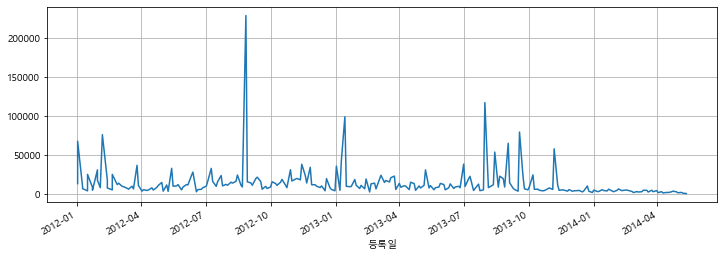

In [13]:
web_traffic['조회수'].plot(figsize=(12,4), grid=True)

In [14]:
# ds, y 확보
web_traffic.reset_index(inplace=True)
web_traffic.rename(columns={'등록일':'ds', '조회수':'y'}, inplace=True)
web_traffic.head()

,ds,y
0,2012-01-02,13613
1,2012-01-02,67983
2,2012-01-09,9613
3,2012-01-09,7257
4,2012-01-16,4333


In [15]:
# Prophet() 함수 사용시
# 주기성이 연단위(yearly_seasonality) 및 일단위(daily_seasonality)가 있다.
# Prophet 클래스 객체를 만들고 시계열 데이터를 입력으로 fit 메서드를 호출한다.
m = Prophet(daily_seasonality=True)
m.fit(web_traffic)

In [16]:
# 16. 7. 1. ~ 17. 6. 30. 홈페이지 방문자수
# make_future_dataframe : 예측날짜 구간 생성
future = m.make_future_dataframe(periods=60) 
future.tail()

,ds
295,2014-07-07
296,2014-07-08
297,2014-07-09
298,2014-07-10
299,2014-07-11


In [17]:
# yhat = 예측값, lower/upper :예측 하한/상한
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
295,2014-07-07,8210.390390,-15017.175844,32408.040206
296,2014-07-08,5561.980066,-17292.482070,29701.997813
297,2014-07-09,7975.280276,-16096.415232,32554.804220
298,2014-07-10,6623.838738,-17242.041740,29417.618210
299,2014-07-11,5092.446812,-19753.909660,29262.967158


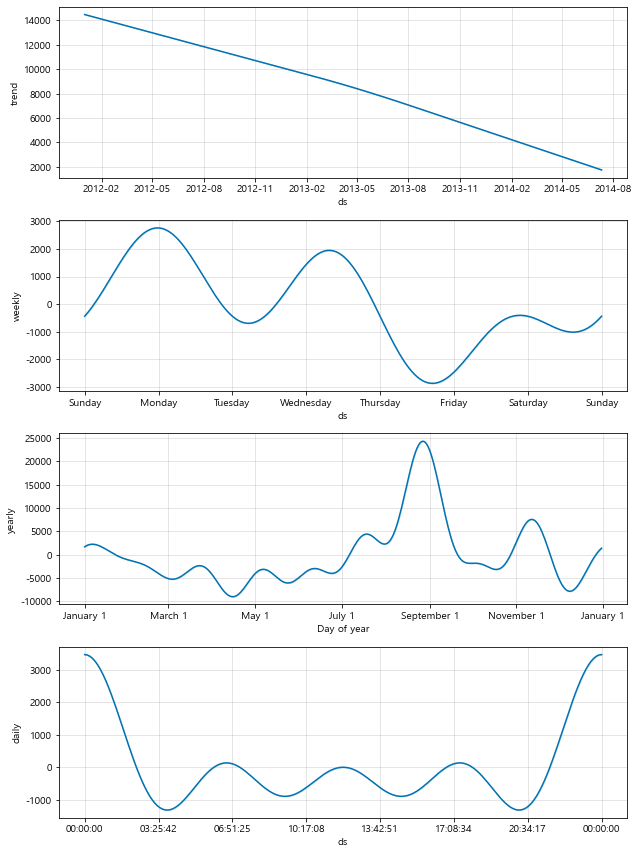

In [18]:
# plot_components : 선형회귀 및 계절성 성분별로 분리
m.plot_components(forecast);

* 결론 : 사이트는 뾰족한 수가 없으면 그냥 폐쇄하는 것으로..

## 시계열 데이터 분석 : 삼성 주식을 분석하세요. (005930.KS) or 관심주
  * 2020.01.01~ 2022.06.30일 까지의 시세를 확인하세요.
  * 1)의 기간의 종가(Close)를 기준으로 그래프를 그려 보세요.
  * 1년 후, 2022.12.31일 까지의 정보를 예측해 보세요.
  * 700일 간의 데이터를 예측해 보세요.
  * 실제 데이터와 예측값을 그래프로 그려 보세요.

In [19]:
start_date = '2020-01-01' 
end_date = '2022-06-30' 
SAM = data.get_data_yahoo('005930.KS', start_date, end_date)
SAM.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,51557.593750
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,51837.796875
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,51837.796875
2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,52118.007812
2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,53052.015625
2020-01-09,58600.0,57400.0,58400.0,58600.0,24102579.0,54733.246094
2020-01-10,59700.0,58300.0,58800.0,59500.0,16000170.0,55573.855469
2020-01-13,60000.0,59100.0,59600.0,60000.0,11359139.0,56040.867188
2020-01-14,61000.0,59900.0,60400.0,60000.0,16906295.0,56040.867188


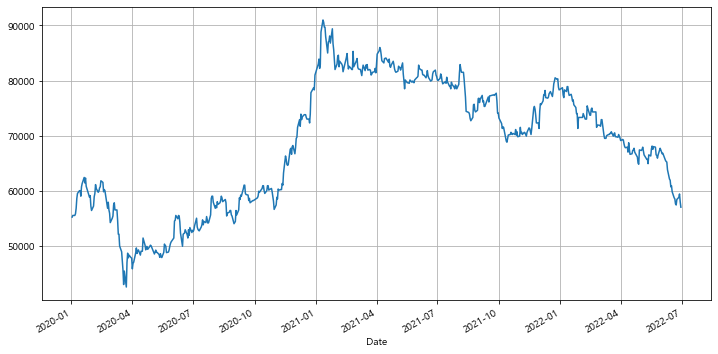

In [20]:
SAM['Close'].plot(figsize=(12,6), grid=True);

In [21]:
# index(날짜)를 추출하기 위해 초기화
SAM.reset_index(inplace=True)

In [22]:
SAM.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,51557.593750
1,2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,51837.796875
2,2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,51837.796875
3,2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,52118.007812
4,2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,53052.015625


In [23]:
# ds(Date), y(Close) 외 column 데이터프레임에서 제외
SAM = SAM.loc[:, ['Date','Close']]
SAM.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)
SAM.head()

,ds,y
0,2020-01-02,55200.0
1,2020-01-03,55500.0
2,2020-01-06,55500.0
3,2020-01-07,55800.0
4,2020-01-08,56800.0


In [24]:
m = Prophet(daily_seasonality=True)
m.fit(SAM)

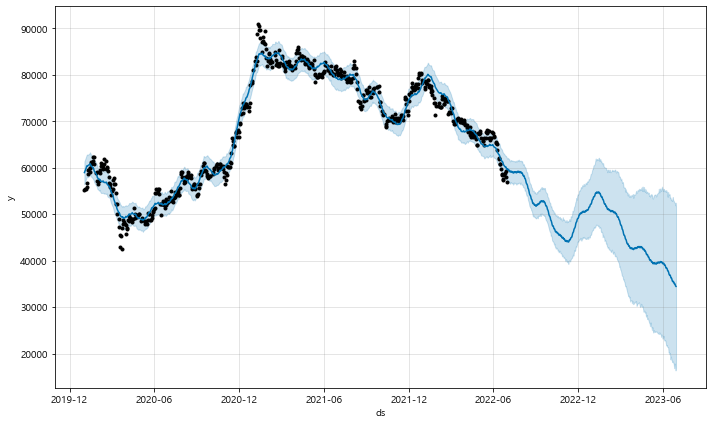

In [28]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast);

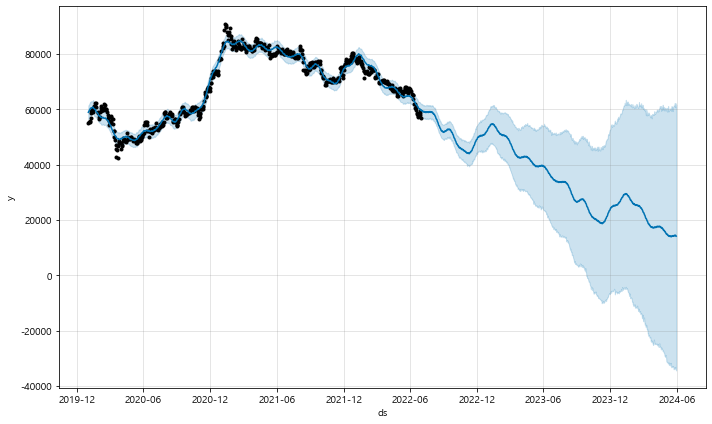

In [29]:
future2 = m.make_future_dataframe(periods=700)
forecast2 = m.predict(future2)
m.plot(forecast2);

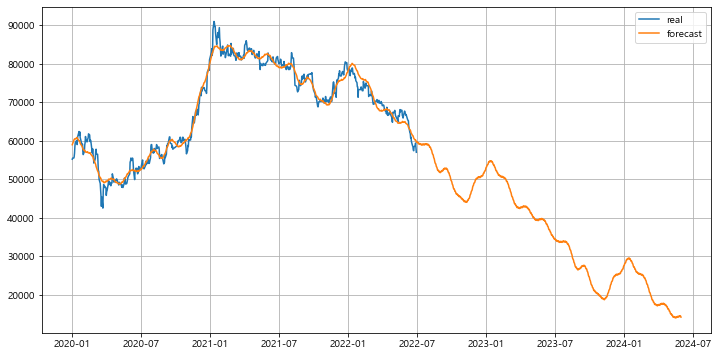

In [30]:
plt.figure(figsize=(12,6))
plt.plot(SAM['ds'], SAM['y'], label='real')
plt.plot(forecast2['ds'],  forecast2['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()